Imports

In [25]:
import zipfile
import tensorflow as tf
import pandas as pd
import pathlib
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Dataset (classes by variant are 1, 31, 61)

In [39]:
# Download zip file 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
#print(class_names)

for dir_names in os.listdir(train_dir):
  if dir_names != class_names[1] and dir_names != class_names[31] and dir_names != class_names[61]:
    shutil.rmtree('101_food_classes_10_percent/train/'+dir_names)
    shutil.rmtree('101_food_classes_10_percent/test/'+dir_names)

!ls 101_food_classes_10_percent/train/

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

--2022-06-05 18:51:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.4’

101_food_classes_10 100%[===================>]   1.51G   185MB/s    in 8.4s    

2022-06-05 18:51:52 (185 MB/s) - ‘101_food_classes_10_percent.zip.4’ saved [1625420029/1625420029]

baby_back_ribs	donuts	lobster_roll_sandwich
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


Neural network

In [58]:
# Create our model
model = Sequential([
  Conv2D(60, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(60, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(60, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

model.evaluate(test_data)

Epoch 1/20
8/8 [==============================] - 5s 643ms/step - loss: 1.1043 - accuracy: 0.3644 - val_loss: 1.0721 - val_accuracy: 0.3533
Epoch 2/20
8/8 [==============================] - 4s 602ms/step - loss: 1.0340 - accuracy: 0.4889 - val_loss: 1.2251 - val_accuracy: 0.3427
Epoch 3/20
8/8 [==============================] - 4s 592ms/step - loss: 1.0130 - accuracy: 0.4489 - val_loss: 1.0750 - val_accuracy: 0.3880
Epoch 4/20
8/8 [==============================] - 4s 601ms/step - loss: 1.0897 - accuracy: 0.5067 - val_loss: 0.9685 - val_accuracy: 0.5227
Epoch 5/20
8/8 [==============================] - 4s 592ms/step - loss: 0.8419 - accuracy: 0.6622 - val_loss: 0.9731 - val_accuracy: 0.4387
Epoch 6/20
8/8 [==============================] - 4s 623ms/step - loss: 0.7624 - accuracy: 0.6267 - val_loss: 1.0768 - val_accuracy: 0.4720
Epoch 7/20
8/8 [==============================] - 4s 598ms/step - loss: 0.7554 - accuracy: 0.6533 - val_loss: 0.8722 - val_accuracy: 0.5760
Epoch 8/20
8/8 [====

[2.1300814151763916, 0.5320000052452087]

Visualize history

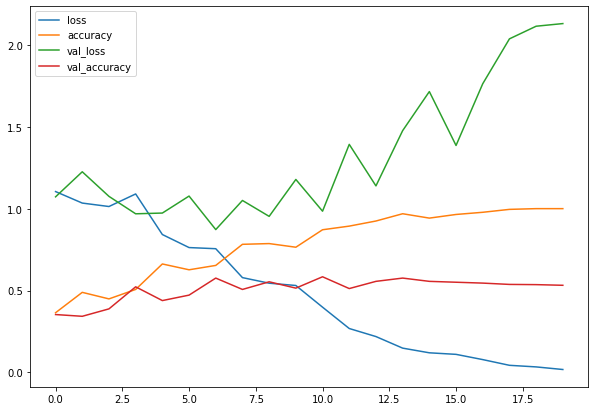

In [59]:
# Plot the training curves
pd.DataFrame(history.history).plot(figsize=(10, 7));